# Week 4 - Objects, Modules, Pandas and Regular Expressions
This week we will review what really makes Python so useful, packages written by others that you can use to do things better, faster, easier. In turn, we will start to discuss how a project can be worked on collaboratively if the code is organized in a way that allows for easy distribution of work. This is done by making your own objects and modules to do repeatable tasks.

This week we will work on regular expressions and Pandas. Regular Expressions help to utilize wildcards for handling text to help solve multiple issues at once in cleaning data, while Pandas is the be-all end-all data cleansing and management tool in Python that any analyst has to know to get the most our of Python.

I should also point out that much of the regular expressions package is built into Pandas as well. This both illustrates the value of the core package (re - regular expressions), and helps illustrate how reusable code can be built into new packages to help make it easier to use.

There is too much to go over everything in these amazing packages, so articles on the basics and the core documentation is linked below:

### Pandas
Pandas is not part of the standard library, but it is part of Anaconda, which is the version of Python we have installed.

Pandas core documentation and home site: https://pandas.pydata.org/

Introduction article to Pandas: https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673

Introduction video on Pandas: https://www.youtube.com/watch?v=dcqPhpY7tWk

### Regular Expressions (re)
re is part of the standard library in Python. 

re core documentation - https://docs.python.org/3/howto/regex.html   https://docs.python.org/3/library/re.html

regular expressions introduction - https://realpython.com/regex-python/


# Exercises

## Exercise 1 - Selecting Cells in a Data Frame
Use the below generated data frame to print the item number and corresponding unit price for each. Notice the first line, we initialize pandas as the keyword pd. This is to bring in the pandas code for us to use and rename it to a shorter name, reducing keystrokes.

In [1]:
import pandas as pd

raw_data = [['SKU0012', '$12.95'], ['SKU0096', '$199.95'], ['SKU1019', '$4.95'], ['SKU1012', '$1,425.00']]

item_df = pd.DataFrame(raw_data, columns = ['Item_Number', 'Unit_Price'])
item_df

,Item_Number,Unit_Price
0,SKU0012,$12.95
1,SKU0096,$199.95
2,SKU1019,$4.95
3,SKU1012,"$1,425.00"


In [2]:
#example:
print(item_df['Item_Number'][0], 'unit price is', item_df['Unit_Price'][0])

SKU0012 unit price is $12.95


In [3]:
# create code to print each line individually
len(item_df.index)

4

In [4]:
len(item_df.columns) 

2

In [5]:
for i in range(len(item_df.index)):
    print(i)

0
1
2
3


<AxesSubplot:>

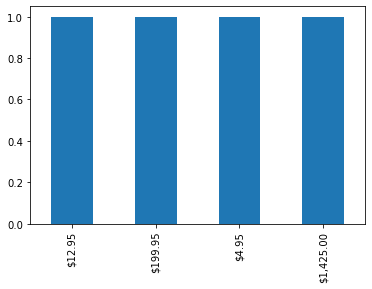

In [6]:
pd.value_counts(item_df['Unit_Price']).plot.bar()

<AxesSubplot:>

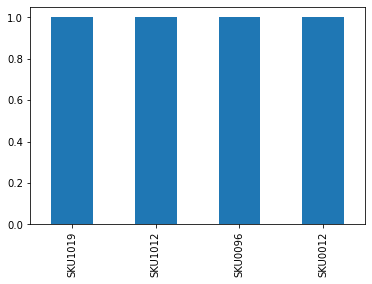

In [7]:
pd.value_counts(item_df['Item_Number']).plot.bar()

In [8]:
item_df.groupby

<bound method DataFrame.groupby of   Item_Number Unit_Price
0     SKU0012     $12.95
1     SKU0096    $199.95
2     SKU1019      $4.95
3     SKU1012  $1,425.00>

## Exercise 2 - Cleaning text and joining two Data Frames
Below is a second data frame that represents an order of these items. There are a few issues you need to deal with in this exercise:
* format the Item Number in the order data frame to match the item data frame
* join the data together to match the quantity and unit price
* transform the text field Unit_Price to a number to calculate the total amount
* create a new column (series) calculating the total amount
* Print the grand total of the order by summing the new calculated totals


In [9]:
order_data = [[12, 5], [96, 9], [1019, 200]]

#error on my part
order_data = pd.DataFrame(order_data, columns = ['Item_Number', 'Quantity'])
order_data

,Item_Number,Quantity
0,12,5
1,96,9
2,1019,200


In [10]:
# create code to complete the steps listed above
#      hint: look up the function .zfill() to help with the missing zeros
#      hint: look up .join() to combine the data
#      hint: mapping with regular expressions can help with converting unit price


# format the Item Number in the order data frame to match the item data frame


In [11]:
'SKU' + '12'.zfill(4)

'SKU0012'

In [12]:
import re 
x = re.sub("\$", "", '$12.95')
float(x)

12.95

In [13]:
# join the data together to match the quantity and unit price
#
order_data.set_index('Item_Number', inplace=True)
order_data



,Quantity
Item_Number,
12,5
96,9
1019,200


In [14]:
item_df.set_index('Item_Number', inplace=True)
item_df

,Unit_Price
Item_Number,
SKU0012,$12.95
SKU0096,$199.95
SKU1019,$4.95
SKU1012,"$1,425.00"


In [15]:
complete_order_data = order_data.join(item_df, how='outer')
complete_order_data

,Quantity,Unit_Price
Item_Number,,
12,5.0,NaN
96,9.0,NaN
1019,200.0,NaN
SKU0012,NaN,$12.95
SKU0096,NaN,$199.95
SKU1012,NaN,"$1,425.00"
SKU1019,NaN,$4.95


In [16]:
complete_order_data['New Column'] = ''
complete_order_data

,Quantity,Unit_Price,New Column
Item_Number,,,
12,5.0,NaN,
96,9.0,NaN,
1019,200.0,NaN,
SKU0012,NaN,$12.95,
SKU0096,NaN,$199.95,
SKU1012,NaN,"$1,425.00",
SKU1019,NaN,$4.95,


In [17]:
complete_order_data['New Column'] = complete_order_data['Quantity'] + complete_order_data['Unit_Price']
complete_order_data

,Quantity,Unit_Price,New Column
Item_Number,,,
12,5.0,NaN,NaN
96,9.0,NaN,NaN
1019,200.0,NaN,NaN
SKU0012,NaN,$12.95,NaN
SKU0096,NaN,$199.95,NaN
SKU1012,NaN,"$1,425.00",NaN
SKU1019,NaN,$4.95,NaN


In [30]:
total_order_data = complete_order_data.replace(['$12.95','$199.95','$1,425.00','$4.95'],['12.95','199.95','1,425.00','4.95'])
total_order_data

,Quantity,Unit_Price,New Column
Item_Number,,,
12,5.0,,NaN
96,9.0,,NaN
1019,200.0,,NaN
SKU0012,nan,12.95,NaN
SKU0096,nan,199.95,NaN
SKU1012,nan,"1,425.00",NaN
SKU1019,nan,4.95,NaN


In [38]:
total_order_data['Total_Amount'] = [(5*12.95),(9.0*199.95), 1425, (200.0*4.95),0,0,0]
total_order_data

,Quantity,Unit_Price,New Column,Total_Amount
Item_Number,,,,
12,5.0,,NaN,64.75
96,9.0,,NaN,1799.55
1019,200.0,,NaN,1425.00
SKU0012,nan,12.95,NaN,990.00
SKU0096,nan,199.95,NaN,0.00
SKU1012,nan,"1,425.00",NaN,0.00
SKU1019,nan,4.95,NaN,0.00


In [40]:
#  Print the grand total of the order by summing the new calculated totals
Total = total_order_data['Total_Amount'].sum()
print (Total)

4279.3
